In [1]:
from google.colab import files
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [4]:
cd '/gdrive/My Drive/Colab Notebooks/GSOC'

/gdrive/My Drive/Colab Notebooks/GSOC


In [ ]:
#!wget http://ftp.ensembl.org/pub/release-105/fasta/drosophila_melanogaster/dna/Drosophila_melanogaster.BDGP6.32.dna_sm.primary_assembly.3L.fa.gz

--2022-04-05 07:58:20--  http://ftp.ensembl.org/pub/release-105/fasta/drosophila_melanogaster/dna/Drosophila_melanogaster.BDGP6.32.dna_sm.primary_assembly.3L.fa.gz
Resolving ftp.ensembl.org (ftp.ensembl.org)... 193.62.197.76
Connecting to ftp.ensembl.org (ftp.ensembl.org)|193.62.197.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8894691 (8.5M) [application/x-gzip]
Saving to: ‘Drosophila_melanogaster.BDGP6.32.dna_sm.primary_assembly.3L.fa.gz’

Drosophila_melanoga 100%[===================>]   8.48M   175KB/s    in 48s     

2022-04-05 07:59:09 (180 KB/s) - ‘Drosophila_melanogaster.BDGP6.32.dna_sm.primary_assembly.3L.fa.gz’ saved [8894691/8894691]



In [3]:
ls

data/
Drosophila_melanogaster.BDGP6.32.dna_sm.primary_assembly.3L.fa
gene_sequence.ipynb
Homo_sapiens.GRCh38.dna_sm.chromosome.1.fa
new.fa
repeat_dataframe.csv
seq_dict.pkl
seq_words_dict.pkl


In [ ]:
#!gzip -d Drosophila_melanogaster.BDGP6.32.dna_sm.primary_assembly.3L.fa.gz

In [1]:
!pip install biopython

In [2]:
from tqdm import tqdm
from Bio import SeqIO
from re import sub
import pandas as pd

# Getting the data

In [ ]:
!sed 's/[Nn]//g' Drosophila_melanogaster.BDGP6.32.dna_sm.primary_assembly.3L.fa > new.fa

In [ ]:
#code to check if there are any N or n in file, N refers to un identified sequences
fasta_sequences = SeqIO.parse(open("new.fa"),'fasta')
all_n_sequences = []
for fasta in fasta_sequences:
  count = 0
  flag = 1
  for i in fasta.seq:
    if((i=='n' or i=='N') and flag==1):
      all_n_sequences.append(count)
      flag = 0
    elif(i!='n' and i!='N'):
      flag = 1
    count+=1 
    if(count%10000000==0):
      print(count,all_n_sequences)

10000000 []
20000000 []


In [ ]:
fasta_sequences = SeqIO.parse(open("new.fa"),'fasta')
all_n_sequences = []
for fasta in fasta_sequences:
  print(fasta.seq[100000:101000])
  print("\n")
  seq = fasta.seq[100000:101000]
  seq_lower = sub("[atgc]", 'R', str(seq))
  seq_upper = sub("[ATGC]", 'N', seq_lower)
  print(seq_upper)
  break

ACAACGAATTaaaaaaaGACACAAATTTTGACTAATAACTTCGGACGCTAACCCATTTTGAGGCATTCATAATTTACAAGGCTAATTCAATTACTATAGTAATATGATCCTTAAAAAGTTAGAAATATACTTGTTGCAAGGGCCTACTTAATTTTACCGaaaacaagagaaaatgctatggtcgagttccccgactgtaagatacccgttacgaagctagtgtgaatgcaaaGATATTTTGGaataaaaaaaataaaaaaaaaTTTTTTAATTGTTCAAAAGTGGCGTGACCGTTTTGTAGGTGTAAAGTGTTTTTGGTATACCTGTAGAAATTGGCAAGACAACCAATAAAACGAAGaaaaatcaaaaaaTTTGTTTTGTTTgcatggcaacatgagtcaagactcttgcgttgcgtctatgtttctaggatctgtaggcctaatctcaaccttctagcttttatagttcctgagatctcgacgttcatacggacggacagggccagatcgactcagctatgatcaagaacatatataCTTCATCGTTGGAAACACTGTCTTCTACTATTCAATGAATATACAATAGTATAACCTTATACTCCATGAGTAATGGGTATAAAAACATTCGATTATCGACAACCAAGTATTGCTTGATTTATTTGTCGGTTGTTGGACCTCAATGAAGCCGGCCAAAGGTCTATTCCGCATGTATACCACTCTCGCCTTAACGGATAATTAAGTTTCTCTCAGTCAAAAAGAGTACGCAAAAGGGAGGGGCAATGTGAAGTTTGTGTACATAAAGCGTAAAATTAAATTATCACCGCACTTAATAAATTATCCTGTAGTAAAGTGCGGCTGAGGTCATTGAACTCCGTATACCCGATGATACGTAGCAGATGTTGTCCCAGGTCGCTTACGACGTTATTCGACGAGCAGATTGACCCGACTGCCACAAAATATTATTTAATGAGCTGGAATGTCGCTTAATACATTAGAGC

In [ ]:
len(fasta)

27992067

First, the genome
needs to be cut into subsequences, which together with their conserved protein domain infor- mation are used as input to the machine learning model. In our approach, we use a sliding window to generate all subsequences ofa particular length (1000 nucleotides in our tests) with an overlapping between them that avoids important regions potentially being cut (1,00 nucleotides in our tests).

In [ ]:
fasta_sequences = SeqIO.parse(open("new.fa"),'fasta')
all_n_sequences = []
seq_dict = {}
seq_dict['Sequence']=[]
seq_dict['Translated']=[]
for fasta in fasta_sequences:
  for i in tqdm(range(0, len(fasta)-1000, 1000)):
    if(i==0):
      seq = fasta.seq[i:i+1000]
    else:
      seq = fasta.seq[i-100:i+900]
    seq_dict['Sequence'].append(str(seq))
    seq_lower = sub("[atgc]", 'R', str(seq))
    seq_upper = sub("[ATGC]", 'N', seq_lower)
    seq_dict['Translated'].append(seq_upper)

100%|██████████| 27992/27992 [00:03<00:00, 8501.30it/s]


In [ ]:
import pickle
with open('seq_dict.pkl', 'wb') as f:
    pickle.dump(seq_dict, f)

In [ ]:
repeat_df = pd.DataFrame.from_dict(seq_dict)
repeat_df.head()

,Sequence,Translated
0,tagggagaaatatgatcgcgtatgcgagagtagtgccaacatattg...,RRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRR...
1,tttctctcccatattatagggagaaatatgatcgcgtatgcgagag...,RRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRR...
2,ccaaaatggtggcggatgaacgagatgataatatattcaagttgcc...,RRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRR...
3,atatatgatcgcgtatgcgagagtagtgccaacatattgtgctaat...,RRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRR...
4,caaaaagacaatacacgacagagagagagagcagcggagatattta...,RRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRR...


In [ ]:
repeat_df.to_csv('repeat_dataframe.csv')

#Translating

In [ ]:
repeat_df = pd.read_csv("repeat_dataframe.csv")
repeat_df.drop('Unnamed: 0',axis='columns', inplace=True)
repeat_df.head()

,Sequence,Translated,Sequence_words_new,Translated_words_new
0,tagggagaaatatgatcgcgtatgcgagagtagtgccaacatattg...,RRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRR...,tagg aggg ggga ggag gaga agaa gaaa aaat aata a...,rrrr rrrr rrrr rrrr rrrr rrrr rrrr rrrr rrrr r...
1,tttctctcccatattatagggagaaatatgatcgcgtatgcgagag...,RRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRR...,tttc ttct tctc ctct tctc ctcc tccc ccca ccat c...,rrrr rrrr rrrr rrrr rrrr rrrr rrrr rrrr rrrr r...
2,ccaaaatggtggcggatgaacgagatgataatatattcaagttgcc...,RRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRR...,ccaa caaa aaaa aaat aatg atgg tggt ggtg gtgg t...,rrrr rrrr rrrr rrrr rrrr rrrr rrrr rrrr rrrr r...
3,atatatgatcgcgtatgcgagagtagtgccaacatattgtgctaat...,RRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRR...,atat tata atat tatg atga tgat gatc atcg tcgc c...,rrrr rrrr rrrr rrrr rrrr rrrr rrrr rrrr rrrr r...
4,caaaaagacaatacacgacagagagagagagcagcggagatattta...,RRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRR...,caaa aaaa aaaa aaag aaga agac gaca acaa caat a...,rrrr rrrr rrrr rrrr rrrr rrrr rrrr rrrr rrrr r...


In [ ]:
counter_R = 0
counter_N = 0
ratio = 0
for rep in repeat_df['Translated']:
  counter_R += rep.count('R')
  counter_N += rep.count('N')

In [ ]:
counter_R/counter_N

0.27673727399624787

In [ ]:
# function to convert sequence strings into k-mer words, default size = 4 (hexamer words)
def getKmers(sequence, size=4):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

In [ ]:
dict_words = {}
dict_words['Sequence_words'] = []
dict_words['Translated_words'] = []
for i in tqdm(range(len(repeat_df))):
  dict_words['Sequence_words'].append(getKmers(repeat_df['Sequence'][i]))
  dict_words['Translated_words'].append(getKmers(repeat_df['Translated'][i]))

100%|██████████| 27992/27992 [00:20<00:00, 1373.07it/s]


In [ ]:
repeat_df['Sequence_words'] = dict_words['Sequence_words']
repeat_df['Translated_words'] = dict_words['Translated_words']

In [ ]:
len(getKmers(repeat_df['Sequence'][0]))

997

In [ ]:
import pickle
with open('seq_words_dict.pkl', 'wb') as f:
    pickle.dump(dict_words, f)

In [ ]:
repeat_df['Sequence_words_new'] = [' '.join(x) for x in repeat_df['Sequence_words']]
repeat_df['Translated_words_new'] = [' '.join(x) for x in repeat_df['Translated_words']]

In [ ]:
repeat_df.drop(['Sequence_words','Translated_words'], axis=1, inplace=True)

In [ ]:
repeat_df.to_csv('repeat_dataframe.csv')

# LANGUAGE TRNSLATION WITH ATTENTION

In [ ]:
with open('seq_words_dict.pkl', 'rb') as f:
    dict_words = pickle.load(f)

In [5]:
repeat_df = pd.read_csv('repeat_dataframe.csv')

In [6]:
repeat_df

,Unnamed: 0,Sequence,Translated,Sequence_words_new,Translated_words_new
0,0,tagggagaaatatgatcgcgtatgcgagagtagtgccaacatattg...,RRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRR...,tagg aggg ggga ggag gaga agaa gaaa aaat aata a...,rrrr rrrr rrrr rrrr rrrr rrrr rrrr rrrr rrrr r...
1,1,tttctctcccatattatagggagaaatatgatcgcgtatgcgagag...,RRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRR...,tttc ttct tctc ctct tctc ctcc tccc ccca ccat c...,rrrr rrrr rrrr rrrr rrrr rrrr rrrr rrrr rrrr r...
2,2,ccaaaatggtggcggatgaacgagatgataatatattcaagttgcc...,RRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRR...,ccaa caaa aaaa aaat aatg atgg tggt ggtg gtgg t...,rrrr rrrr rrrr rrrr rrrr rrrr rrrr rrrr rrrr r...
3,3,atatatgatcgcgtatgcgagagtagtgccaacatattgtgctaat...,RRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRR...,atat tata atat tatg atga tgat gatc atcg tcgc c...,rrrr rrrr rrrr rrrr rrrr rrrr rrrr rrrr rrrr r...
4,4,caaaaagacaatacacgacagagagagagagcagcggagatattta...,RRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRR...,caaa aaaa aaaa aaag aaga agac gaca acaa caat a...,rrrr rrrr rrrr rrrr rrrr rrrr rrrr rrrr rrrr r...
...,...,...,...,...,...
27987,27987,tgaatacatgtagaacaacaggtcaagccttgttggccacggcctt...,RRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRR...,tgaa gaat aata atac taca acat catg atgt tgta g...,rrrr rrrr rrrr rrrr rrrr rrrr rrrr rrrr rrrr r...
27988,27988,atttgtggtttcggcagatattgaaaagatgtaccgacaaattaaa...,RRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRR...,attt tttg ttgt tgtg gtgg tggt ggtt gttt tttc t...,rrrr rrrr rrrr rrrr rrrr rrrr rrrr rrrr rrrr r...
27989,27989,agtggtcaaagtaagatcaaatttataagaagaagaacggatgaca...,RRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRR...,agtg gtgg tggt ggtc gtca tcaa caaa aaag aagt a...,rrrr rrrr rrrr rrrr rrrr rrrr rrrr rrrr rrrr r...
27990,27990,agaagatttattgctagacggggaaaatgttccaatatctattcaa...,RRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRR...,agaa gaag aaga agat gatt attt ttta ttat tatt a...,rrrr rrrr rrrr rrrr rrrr rrrr rrrr rrrr rrrr r...


In [7]:
len(repeat_df['Sequence_words_new'][0].split())

997

In [8]:
from __future__ import unicode_literals, print_function, division
from io import open
import unicodedata
import string
import re
import random

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [9]:
SOS_token = 0
EOS_token = 1


class Lang:
    def __init__(self, name):
        self.name = name
        self.word2index = {}
        self.word2count = {}
        self.index2word = {0: "SOS", 1: "EOS"}
        self.n_words = 2  # Count SOS and EOS

    def addSentence(self, sentence):
        for word in sentence.split(' '):
            self.addWord(word)

    def addWord(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.n_words
            self.word2count[word] = 1
            self.index2word[self.n_words] = word
            self.n_words += 1
        else:
            self.word2count[word] += 1

In [10]:
def readLangs(lang_1, lang_2, reverse=False):
    print("Reading lines...")
    lang1 = 'seq'
    lang2 = 'rep'
    # Read the file and split into lines
    pairs = []
    for i in range(len(lang_1)):
      pairs.append([lang_1[i],lang_2[i]])
    # Reverse pairs, make Lang instances

    input_lang = Lang(lang1)
    output_lang = Lang(lang2)

    return input_lang, output_lang, pairs

In [11]:
import ast
input_lang, output_lang, pairs = readLangs(repeat_df['Sequence_words_new'],repeat_df['Translated_words_new'])

Reading lines...


In [12]:
MAX_LENGTH = 1000
def filterPair(p):
    return len(p[0].split(' ')) < MAX_LENGTH and len(p[1].split(' ')) < MAX_LENGTH 

def filterPairs(pairs):
    return [pair for pair in pairs if filterPair(pair)]

In [13]:
def prepareData(lang1, lang2, reverse=False):
    input_lang, output_lang, pairs = readLangs(lang1, lang2, reverse)
    print("Read %s sentence pairs" % len(pairs))
    pairs = filterPairs(pairs)
    print("Trimmed to %s sentence pairs" % len(pairs))
    print("Counting words...")
    for pair in pairs:
        input_lang.addSentence(pair[0])
        output_lang.addSentence(pair[1])
    print("Counted words:")
    print(input_lang.name, input_lang.n_words)
    print(output_lang.name, output_lang.n_words)
    return input_lang, output_lang, pairs


input_lang, output_lang, pairs = prepareData(repeat_df['Sequence_words_new'],repeat_df['Translated_words_new'], True)
print(random.choice(pairs))

Reading lines...
Read 27992 sentence pairs
Trimmed to 27992 sentence pairs
Counting words...
Counted words:
seq 258
rep 13
['ttga tgac gaca acac cact actt cttt tttc ttct tctt cttt tttt tttc ttct tctg ctgt tgta gtat tatg atgt tgtt gttt tttt tttt tttt tttt tttt tttt tttc ttcg tcgt cgtg gtgt tgtg gtgt tgtg gtgt tgtg gtgt tgtg gtgt tgtg gtgt tgtg gtgt tgtg gtgc tgct gctg ctgt tgtg gtgc tgcc gccc ccca ccaa caac aacc accg ccga cgag gagt agtg gtgt tgtg gtgc tgcg gcgg cggc ggca gcac cact actt ctta ttaa taac aaca acat catg atga tgaa gaaa aaat aatt atta ttaa taag aagt agta gtaa taaa aaat aatt atta ttaa taag aagt agta gtaa taaa aaaa aaaa aaat aata atat tatt attt tttt ttta ttaa taat aatt attc ttca tcaa caat aatt atta ttag taga agaa gaaa aaac aacc acct cctc ctcg tcgc cgca gcaa caac aacc accc ccca ccag caga agag gagt agtg gtgc tgct gcta ctaa taaa aaat aatg atgt tgtg gtgg tgga ggaa gaat aatt attt tttc ttct tctc ctct tctt cttt tttg ttgt tgtc gtca tcat catt attg ttgc tgca gcag cagt agtt gttg ttga tgaa 

# MODELS

In [14]:
class EncoderRNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(EncoderRNN, self).__init__()
        self.hidden_size = hidden_size

        self.embedding = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size)

    def forward(self, input, hidden):
        embedded = self.embedding(input).view(1, 1, -1)
        output = embedded
        output, hidden = self.gru(output, hidden)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

In [15]:
class AttnDecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size, dropout_p=0.1, max_length=MAX_LENGTH):
        super(AttnDecoderRNN, self).__init__()
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.dropout_p = dropout_p
        self.max_length = max_length

        self.embedding = nn.Embedding(self.output_size, self.hidden_size)
        self.attn = nn.Linear(self.hidden_size * 2, self.max_length)
        self.attn_combine = nn.Linear(self.hidden_size * 2, self.hidden_size)
        self.dropout = nn.Dropout(self.dropout_p)
        self.gru = nn.GRU(self.hidden_size, self.hidden_size)
        self.out = nn.Linear(self.hidden_size, self.output_size)

    def forward(self, input, hidden, encoder_outputs):
        embedded = self.embedding(input).view(1, 1, -1)
        embedded = self.dropout(embedded)

        attn_weights = F.softmax(
            self.attn(torch.cat((embedded[0], hidden[0]), 1)), dim=1)
        attn_applied = torch.bmm(attn_weights.unsqueeze(0),
                                 encoder_outputs.unsqueeze(0))

        output = torch.cat((embedded[0], attn_applied[0]), 1)
        output = self.attn_combine(output).unsqueeze(0)

        output = F.relu(output)
        output, hidden = self.gru(output, hidden)

        output = F.log_softmax(self.out(output[0]), dim=1)
        return output, hidden, attn_weights

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

In [16]:
def indexesFromSentence(lang, sentence):
    return [lang.word2index[word] for word in sentence.split(' ')]


def tensorFromSentence(lang, sentence):
    indexes = indexesFromSentence(lang, sentence)
    indexes.append(EOS_token)
    return torch.tensor(indexes, dtype=torch.long, device=device).view(-1, 1)


def tensorsFromPair(pair):
    input_tensor = tensorFromSentence(input_lang, pair[0])
    target_tensor = tensorFromSentence(output_lang, pair[1])
    return (input_tensor, target_tensor)

In [17]:
teacher_forcing_ratio = 0.5


def train(input_tensor, target_tensor, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion, max_length=MAX_LENGTH):
    encoder_hidden = encoder.initHidden()

    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()

    input_length = input_tensor.size(0)
    target_length = target_tensor.size(0)

    encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

    loss = 0

    for ei in range(input_length):
        encoder_output, encoder_hidden = encoder(
            input_tensor[ei], encoder_hidden)
        encoder_outputs[ei] = encoder_output[0, 0]

    decoder_input = torch.tensor([[SOS_token]], device=device)

    decoder_hidden = encoder_hidden

    use_teacher_forcing = True if random.random() < teacher_forcing_ratio else False

    if use_teacher_forcing:
        # Teacher forcing: Feed the target as the next input
        for di in range(target_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            loss += criterion(decoder_output, target_tensor[di])
            decoder_input = target_tensor[di]  # Teacher forcing

    else:
        # Without teacher forcing: use its own predictions as the next input
        for di in range(target_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            topv, topi = decoder_output.topk(1)
            decoder_input = topi.squeeze().detach()  # detach from history as input

            loss += criterion(decoder_output, target_tensor[di])
            if decoder_input.item() == EOS_token:
                break

    loss.backward()

    encoder_optimizer.step()
    decoder_optimizer.step()

    return loss.item() / target_length

In [18]:
import time
import math


def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)


def timeSince(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return '%s (- %s)' % (asMinutes(s), asMinutes(rs))

In [25]:
import matplotlib.pyplot as plt
plt.switch_backend('agg')
import matplotlib.ticker as ticker
import numpy as np
%matplotlib notebook
%matplotlib inline

def showPlot(points):

    plt.figure()
    fig, ax = plt.subplots()
    # this locator puts ticks at regular intervals
    loc = ticker.MultipleLocator(base=0.2)
    ax.yaxis.set_major_locator(loc)
    plt.plot(points)
    plt.show()

In [20]:
def evaluateRandomly(encoder, decoder, n=10):
    for i in range(n):
        pair = random.choice(pairs)
        print('>', pair[0])
        print('=', pair[1])
        output_words, attentions = evaluate(encoder, decoder, pair[0])
        output_sentence = ' '.join(output_words)
        print('<', output_sentence)
        print('')

In [21]:
def evaluate(encoder, decoder, sentence, max_length=MAX_LENGTH):
    with torch.no_grad():
        input_tensor = tensorFromSentence(input_lang, sentence)
        input_length = input_tensor.size()[0]
        encoder_hidden = encoder.initHidden()

        encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

        for ei in range(input_length):
            encoder_output, encoder_hidden = encoder(input_tensor[ei],
                                                     encoder_hidden)
            encoder_outputs[ei] += encoder_output[0, 0]

        decoder_input = torch.tensor([[SOS_token]], device=device)  # SOS

        decoder_hidden = encoder_hidden

        decoded_words = []
        decoder_attentions = torch.zeros(max_length, max_length)

        for di in range(max_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            decoder_attentions[di] = decoder_attention.data
            topv, topi = decoder_output.data.topk(1)
            if topi.item() == EOS_token:
                decoded_words.append('<EOS>')
                break
            else:
                decoded_words.append(output_lang.index2word[topi.item()])

            decoder_input = topi.squeeze().detach()

        return decoded_words, decoder_attentions[:di + 1]

In [22]:
def trainIters(encoder, decoder, n_iters, print_every=1000, plot_every=100, learning_rate=0.01):
    start = time.time()
    plot_losses = []
    print_loss_total = 0  # Reset every print_every
    plot_loss_total = 0  # Reset every plot_every

    encoder_optimizer = optim.SGD(encoder.parameters(), lr=learning_rate)
    decoder_optimizer = optim.SGD(decoder.parameters(), lr=learning_rate)
    training_pairs = [tensorsFromPair(random.choice(pairs))
                      for i in range(n_iters)]
    criterion = nn.NLLLoss()

    for iter in tqdm(range(1, n_iters + 1)):
        training_pair = training_pairs[iter - 1]
        input_tensor = training_pair[0]
        target_tensor = training_pair[1]

        loss = train(input_tensor, target_tensor, encoder,
                     decoder, encoder_optimizer, decoder_optimizer, criterion)
        print_loss_total += loss
        plot_loss_total += loss

        if iter % print_every == 0:
            print_loss_avg = print_loss_total / print_every
            print_loss_total = 0
            print('%s (%d %d%%) %.4f' % (timeSince(start, iter / n_iters),
                                         iter, iter / n_iters * 100, print_loss_avg))

        if iter % plot_every == 0:
            plot_loss_avg = plot_loss_total / plot_every
            plot_losses.append(plot_loss_avg)
            plot_loss_total = 0

    showPlot(plot_losses)

  5%|▌         | 10/200 [00:17<06:27,  2.04s/it]

0m 17s (- 5m 40s) (10 5%) 30.0153


 10%|█         | 20/200 [00:38<06:19,  2.11s/it]

0m 38s (- 5m 49s) (20 10%) 217.4097


 15%|█▌        | 30/200 [01:00<06:03,  2.14s/it]

1m 0s (- 5m 44s) (30 15%) 975.7907


 20%|██        | 40/200 [01:21<05:32,  2.08s/it]

1m 21s (- 5m 26s) (40 20%) 829.1342


 25%|██▌       | 50/200 [01:42<05:11,  2.08s/it]

1m 42s (- 5m 7s) (50 25%) 808.0141


 30%|███       | 60/200 [02:02<04:44,  2.03s/it]

2m 2s (- 4m 46s) (60 30%) 623.6958


 35%|███▌      | 70/200 [02:24<04:34,  2.11s/it]

2m 24s (- 4m 28s) (70 35%) 259.7534


 40%|████      | 80/200 [02:44<04:05,  2.05s/it]

2m 45s (- 4m 7s) (80 40%) 906.9289


 45%|████▌     | 90/200 [03:05<03:45,  2.05s/it]

3m 5s (- 3m 47s) (90 45%) 140.1808


 50%|█████     | 100/200 [03:26<03:26,  2.07s/it]

3m 26s (- 3m 26s) (100 50%) 145.1845


 55%|█████▌    | 110/200 [03:47<03:04,  2.05s/it]

3m 47s (- 3m 5s) (110 55%) 401.6543


 60%|██████    | 120/200 [04:07<02:46,  2.08s/it]

4m 7s (- 2m 45s) (120 60%) 168.4846


 65%|██████▌   | 130/200 [04:28<02:28,  2.13s/it]

4m 29s (- 2m 24s) (130 65%) 544.3780


 70%|███████   | 140/200 [04:49<02:05,  2.10s/it]

4m 50s (- 2m 4s) (140 70%) 1041.5784


 75%|███████▌  | 150/200 [05:10<01:45,  2.10s/it]

5m 11s (- 1m 43s) (150 75%) 505.5156


 80%|████████  | 160/200 [05:31<01:24,  2.11s/it]

5m 31s (- 1m 22s) (160 80%) 791.9645


 85%|████████▌ | 170/200 [05:52<01:02,  2.09s/it]

5m 52s (- 1m 2s) (170 85%) 592.3461


 90%|█████████ | 180/200 [06:13<00:41,  2.08s/it]

6m 13s (- 0m 41s) (180 90%) 865.0950


 95%|█████████▌| 190/200 [06:34<00:20,  2.05s/it]

6m 34s (- 0m 20s) (190 95%) 564.7923


100%|██████████| 200/200 [06:55<00:00,  2.08s/it]

6m 55s (- 0m 0s) (200 100%) 636.2840


<Figure size 432x288 with 0 Axes>

Locator attempting to generate 5565 ticks ([-20.6, ..., 1092.2]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 5565 ticks ([-20.6, ..., 1092.2]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 5565 ticks ([-20.6, ..., 1092.2]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 5565 ticks ([-20.6, ..., 1092.2]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 5565 ticks ([-20.6, ..., 1092.2]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 5565 ticks ([-20.6, ..., 1092.2]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 5565 ticks ([-20.6, ..., 1092.2]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 5565 ticks ([-20.6, ..., 1092.2]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 5565 ticks ([-20.6, ..., 1092.2]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 5565 ticks ([-20.6, ...,

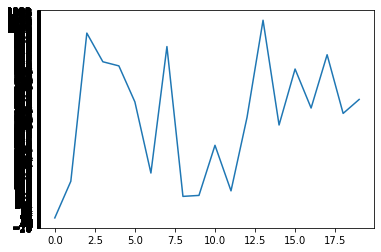

In [32]:
hidden_size = 256
encoder1 = EncoderRNN(input_lang.n_words, hidden_size).to(device)
attn_decoder1 = AttnDecoderRNN(hidden_size, output_lang.n_words, dropout_p=0.1).to(device)

trainIters(encoder1, attn_decoder1, n_iters = 200, print_every=10, plot_every=10)

In [30]:
len(repeat_df['Sequence'][0])

1000

In [37]:
evaluateRandomly(encoder1, attn_decoder1)

> tggg gggc ggcc gcct cctc ctcg tcgt cgtc gtct tctg ctgc tgct gctc ctca tcaa caaa aaat aatg atgc tgcc gcca ccac cact actg ctgt tgta gtaa taaa aaac aaca acaa caat aatc atcc tccc ccct cctg ctgc tgcg gcgg cgga ggat gatg atgt tgtt gttc ttct tctc ctcc tccc ccca ccaa caag aagc agca gcag cagc agca gcag cagg agga ggag gagg aggc ggcg gcga cgaa gaat aatg atgt tgtt gttc ttct tctt ctta ttaa taac aact actt cttc ttcg tcgc cgcc gcca ccac cacc acct ccta ctat tatc atct tctg ctga tgaa gaag aagg aggc ggca gcat catt attc ttcg tcgc cgcc gcct cctt cttg ttga tgat gatt attt ttta ttat tatg atgt tgtc gtcc tcct cctg ctgc tgcc gccc cccg ccga cgaa gaaa aaac aacg acgg cgga ggac gact actg ctgg tgga ggac gacg acgg cggc ggca gcag caga agag gaga agaa gaag aaga agat gatc atcg tcga cgac gaca acat catg atgc tgct gctg ctgc tgct gctg ctgg tgga ggag gagg agga ggag gagg aggg gggc ggca gcac cacg acgg cgga ggat gatt attt ttta ttat tatt attt tttc ttcg tcgg cggg gggc ggcc gcca ccag cagc agct gctc ctcg tcgg cgga ggat gatg atgt tgt

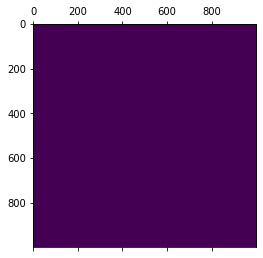

In [36]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
%matplotlib inline
output_words, attentions = evaluate(
    encoder1, attn_decoder1, repeat_df['Sequence_words_new'][0])
plt.matshow(attentions.numpy())
plt.show()